In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import json
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
job_title=[]
companies=[]
locations=[]
ratings=[]
salaries=[]

In [ ]:
jobs=["data-scientist", "data-analyst"]

In [ ]:
for job in jobs:
    number = 0
    if job == 'data-scientist':
        number = 14
    else:
        number = 12
        
    for i in range(1, 26):
        source = requests.get('https://www.glassdoor.ca/Job/' + str(job) + '-jobs-SRCH_KO0,' + str(number) + '_IP' + str(i) + '.htm').text
        soup = BeautifulSoup(source, 'lxml')

        job_containers = soup.find_all('li', class_ = 'react-job-listing')

        for container in job_containers:
            title = container.find('a', class_='jobLink css-1rd3saf eigr9kq3').text
            job_title.append(title)
            try:
              company = container.find("a", class_= lambda value: value and value.endswith("css-l2wjgv e1n63ojh0 jobLink")).text
            except:
              company = "NA"
            companies.append(company)
            try:
              location = container.find('span', class_='css-3g3psg pr-xxsm css-iii9i8 e1rrn5ka0').text
            except:
              location = "NA"
            locations.append(location)
            try:
              rating = container.find('span', class_= lambda value: value and value.endswith('css-2lqh28 e1cjmv6j1')).text
            except:
              rating = 'NA'
            ratings.append(rating)
            try:
              salary = container.find('span', class_='css-1xe2xww e1wijj242').text
              salary = salary.split('(')[0].strip()
            except:
              salary = 'NA'
            salaries.append(salary)

In [ ]:
dict = {'Job_Title': job_title, 'Company_name': companies, 'Company_Rating': ratings, 'Location':locations, 'salary': salaries}
df = pd.DataFrame(dict)
df

In [ ]:
df['salary'] = df['salary'].str.replace('K','000')
df['salary'] = df['salary'].str.replace('$','')
df

In [ ]:
df[['min_range', 'max_range']] = df['salary'].str.split('-', 1, expand=True)
df.max_range.fillna('NA', inplace=True)
#df.min_range = df.min_range.replace("NA" , 0.0).astype(float)
df

In [ ]:
for i in range(len(df)):
    text= df['min_range'][i]
    text=text.strip()
    if re.search('Per Hour',text)!=None:
      item_list=re.split(' ',text)
      df.iloc[i,5]=float(item_list[0])

In [ ]:
df.min_range = df.min_range.replace("NA" , 0.0).astype(float)
df

,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range
0,Associate Data Scientist,Bank of Canada,3.7,Ottawa,105000 - 111000,105000.0,111000
1,"Data Scientist, MIR (English Services)",CBC/Radio-Canada,3.7,Toronto,88000 - 105000,88000.0,105000
2,Data Scientist,NAIT,3.9,Edmonton,6000 - 8000,6000.0,8000
3,data scientist,Innovations MUUTAA Inc.,NA,Quebec,80000 - 81000,80000.0,81000
4,Lead Data Scientist – Refugee Resettlement and...,Pairity,NA,Remote,90000 - 120000,90000.0,120000
...,...,...,...,...,...,...,...
1495,"Analyst, Data Analytics and Management",Raymond James Financial,4,Canada,NA,0.0,NA
1496,Market Intelligence Analyst / Strategy Analyst,Meta Materials,4.5,Burnaby,60000 - 90000,60000.0,90000
1497,Data Analyst,International Development Research Centre,3.2,Ottawa,67000 - 77000,67000.0,77000
1498,Data Analyst - FTT,Translink BC,4.2,Vancouver,7000,7000.0,NA


In [ ]:
for i in range(len(df)):
    text= df['max_range'][i]
    text=text.strip()
    if re.search('Per Hour',text)!=None:
      item_list=re.split(' ',text)
      df.iloc[i,6]=float(item_list[0])*2080
      df.iloc[i,5]=float(df.iloc[i,5])*2080
    else:
      if re.search('NA',text)!=None:
        continue
      else:
        item_list=re.split(' ',text)
        df.iloc[i,6]=float(item_list[0])
      
df

,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range
0,Associate Data Scientist,Bank of Canada,3.7,Ottawa,105000 - 111000,105000.0,111000.0
1,"Data Scientist, MIR (English Services)",CBC/Radio-Canada,3.7,Toronto,88000 - 105000,88000.0,105000.0
2,Data Scientist,NAIT,3.9,Edmonton,6000 - 8000,6000.0,8000.0
3,data scientist,Innovations MUUTAA Inc.,NA,Quebec,80000 - 81000,80000.0,81000.0
4,Lead Data Scientist – Refugee Resettlement and...,Pairity,NA,Remote,90000 - 120000,90000.0,120000.0
...,...,...,...,...,...,...,...
1495,"Analyst, Data Analytics and Management",Raymond James Financial,4,Canada,NA,0.0,NA
1496,Market Intelligence Analyst / Strategy Analyst,Meta Materials,4.5,Burnaby,60000 - 90000,60000.0,90000.0
1497,Data Analyst,International Development Research Centre,3.2,Ottawa,67000 - 77000,67000.0,77000.0
1498,Data Analyst - FTT,Translink BC,4.2,Vancouver,7000,7000.0,NA


In [ ]:
df.max_range = df.max_range.replace("NA" , 0.0).astype(float)
df

,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range
0,Associate Data Scientist,Bank of Canada,3.7,Ottawa,105000 - 111000,105000.0,111000.0
1,"Data Scientist, MIR (English Services)",CBC/Radio-Canada,3.7,Toronto,88000 - 105000,88000.0,105000.0
2,Data Scientist,NAIT,3.9,Edmonton,6000 - 8000,6000.0,8000.0
3,data scientist,Innovations MUUTAA Inc.,NA,Quebec,80000 - 81000,80000.0,81000.0
4,Lead Data Scientist – Refugee Resettlement and...,Pairity,NA,Remote,90000 - 120000,90000.0,120000.0
...,...,...,...,...,...,...,...
1495,"Analyst, Data Analytics and Management",Raymond James Financial,4,Canada,NA,0.0,0.0
1496,Market Intelligence Analyst / Strategy Analyst,Meta Materials,4.5,Burnaby,60000 - 90000,60000.0,90000.0
1497,Data Analyst,International Development Research Centre,3.2,Ottawa,67000 - 77000,67000.0,77000.0
1498,Data Analyst - FTT,Translink BC,4.2,Vancouver,7000,7000.0,0.0


In [ ]:
# df['avg_salary'] = df[['min_range', 'max_range']].mean(axis=1)
# df.head(10)

for i in range(len(df)):
  if df.iloc[i,6] == 0.0:
    df.iloc[i,6] = df.iloc[i,5]
  
df

,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range
0,Associate Data Scientist,Bank of Canada,3.7,Ottawa,105000 - 111000,105000.0,111000.0
1,"Data Scientist, MIR (English Services)",CBC/Radio-Canada,3.7,Toronto,88000 - 105000,88000.0,105000.0
2,Data Scientist,NAIT,3.9,Edmonton,6000 - 8000,6000.0,8000.0
3,data scientist,Innovations MUUTAA Inc.,NA,Quebec,80000 - 81000,80000.0,81000.0
4,Lead Data Scientist – Refugee Resettlement and...,Pairity,NA,Remote,90000 - 120000,90000.0,120000.0
...,...,...,...,...,...,...,...
1495,"Analyst, Data Analytics and Management",Raymond James Financial,4,Canada,NA,0.0,0.0
1496,Market Intelligence Analyst / Strategy Analyst,Meta Materials,4.5,Burnaby,60000 - 90000,60000.0,90000.0
1497,Data Analyst,International Development Research Centre,3.2,Ottawa,67000 - 77000,67000.0,77000.0
1498,Data Analyst - FTT,Translink BC,4.2,Vancouver,7000,7000.0,7000.0


In [ ]:
df['avg_salary'] = df[['min_range', 'max_range']].mean(axis=1)
df


,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range,avg_salary
0,Associate Data Scientist,Bank of Canada,3.7,Ottawa,105000 - 111000,105000.0,111000.0,108000.0
1,"Data Scientist, MIR (English Services)",CBC/Radio-Canada,3.7,Toronto,88000 - 105000,88000.0,105000.0,96500.0
2,Data Scientist,NAIT,3.9,Edmonton,6000 - 8000,6000.0,8000.0,7000.0
3,data scientist,Innovations MUUTAA Inc.,NA,Quebec,80000 - 81000,80000.0,81000.0,80500.0
4,Lead Data Scientist – Refugee Resettlement and...,Pairity,NA,Remote,90000 - 120000,90000.0,120000.0,105000.0
...,...,...,...,...,...,...,...,...
1495,"Analyst, Data Analytics and Management",Raymond James Financial,4,Canada,NA,0.0,0.0,0.0
1496,Market Intelligence Analyst / Strategy Analyst,Meta Materials,4.5,Burnaby,60000 - 90000,60000.0,90000.0,75000.0
1497,Data Analyst,International Development Research Centre,3.2,Ottawa,67000 - 77000,67000.0,77000.0,72000.0
1498,Data Analyst - FTT,Translink BC,4.2,Vancouver,7000,7000.0,7000.0,7000.0


In [ ]:
df['min_range'] = df['min_range'].replace(0.0, np.nan)
df['max_range'] = df['max_range'].replace(0.0, np.nan)
df['avg_salary'] = df['avg_salary'].replace(0.0, np.nan)
df['Company_Rating'] = df['Company_Rating'].replace('NA', np.nan)
df.head(10)

,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range,avg_salary
0,Associate Data Scientist,Bank of Canada,3.7,Ottawa,105000 - 111000,105000.0,111000.0,108000.0
1,"Data Scientist, MIR (English Services)",CBC/Radio-Canada,3.7,Toronto,88000 - 105000,88000.0,105000.0,96500.0
2,Data Scientist,NAIT,3.9,Edmonton,6000 - 8000,6000.0,8000.0,7000.0
3,data scientist,Innovations MUUTAA Inc.,NaN,Quebec,80000 - 81000,80000.0,81000.0,80500.0
4,Lead Data Scientist – Refugee Resettlement and...,Pairity,NaN,Remote,90000 - 120000,90000.0,120000.0,105000.0
5,Data Scientist/Machine Learning Intern (12 wee...,KN Technologies,NaN,Remote,17.50 - 25.00 Per Hour,36400.0,52000.0,44200.0
6,Data Scientist,Evergreen College,3.5,Remote,47.00 - 52.00 Per Hour,97760.0,108160.0,102960.0
7,Data Scientist,Points,5,Toronto,96000 - 120000,96000.0,120000.0,108000.0
8,Junior Data Scientist,M&M Food Market,3.8,Mississauga,74000 - 119000,74000.0,119000.0,96500.0
9,Data Scientist,Manulife,4,Toronto,96000 - 126000,96000.0,126000.0,111000.0


**Highest rated companies**

In [ ]:
# df[df.values  == 'OMERS']
# selected_gold1 = selected_gold.sort_values('Athlete')
# selected_gold1
#df.groupby(['Company_Rating'])['Medal'].count().sort_values(ascending=False)[:3]
df3=df.sort_values(['Company_Rating'],ascending=False).drop_duplicates(['Company_name']).reset_index()
df3

,index,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range,avg_salary
0,397,Data Scientist,Points,5,Toronto,96000 - 120000,96000.0,120000.0,108000.0
1,355,Data Scientist (remote),Ample Insight Inc.,5,Toronto,57000 - 120000,57000.0,120000.0,88500.0
2,649,Data Scientist,Railvision Analytics,5,Remote,NA,NaN,NaN,NaN
3,652,Senior Data Scientist,Glia,5,Vancouver,48000 - 104000,48000.0,104000.0,76000.0
4,896,Market Intelligence Analyst / Strategy Analyst,Meta Materials,4.5,Burnaby,60000 - 90000,60000.0,90000.0,75000.0
5,239,Senior Data Scientist,Mastercard,4.3,Vancouver,112000 - 129000,112000.0,129000.0,120500.0
6,1290,People Data Analyst,Lululemon,4.3,Vancouver,NA,NaN,NaN,NaN
7,1138,Data Analyst - FTT,Translink BC,4.2,Vancouver,7000,7000.0,7000.0,7000.0
8,1236,Data Analyst,goeasy,4.1,Mississauga,69000 - 81000,69000.0,81000.0,75000.0
9,886,"2023 Summer Student, Data Analyst, RBCx Analytics",Royal Bank of Canada,4.1,Toronto,57000 - 85000,57000.0,85000.0,71000.0


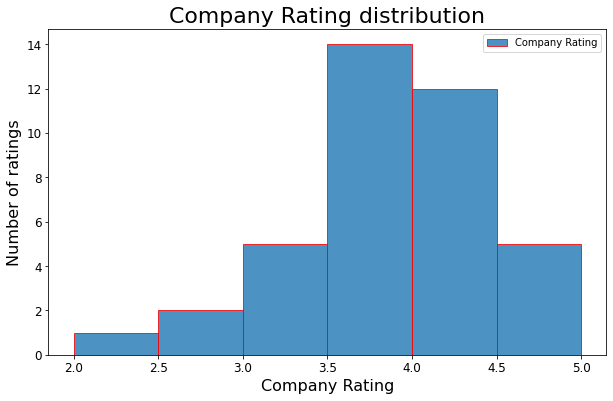

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(df3['Company_Rating'].astype('float'), bins = 6, range = (2,5), label='Company Rating', alpha=0.8, edgecolor='red')

plt.title('Company Rating distribution', fontsize=22)
plt.xlabel('Company Rating', fontsize=16)
plt.ylabel('Number of ratings', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

In [ ]:
df4 = df3[df3.Company_Rating != 'NA'].reset_index()
df4[:10]

,level_0,index,Job_Title,Company_name,Company_Rating,Location,salary,min_range,max_range,avg_salary
0,0,397,Data Scientist,Points,5,Toronto,96000 - 120000,96000.0,120000.0,108000.0
1,1,355,Data Scientist (remote),Ample Insight Inc.,5,Toronto,57000 - 120000,57000.0,120000.0,88500.0
2,2,649,Data Scientist,Railvision Analytics,5,Remote,NA,NaN,NaN,NaN
3,3,652,Senior Data Scientist,Glia,5,Vancouver,48000 - 104000,48000.0,104000.0,76000.0
4,4,896,Market Intelligence Analyst / Strategy Analyst,Meta Materials,4.5,Burnaby,60000 - 90000,60000.0,90000.0,75000.0
5,5,239,Senior Data Scientist,Mastercard,4.3,Vancouver,112000 - 129000,112000.0,129000.0,120500.0
6,6,1290,People Data Analyst,Lululemon,4.3,Vancouver,NA,NaN,NaN,NaN
7,7,1138,Data Analyst - FTT,Translink BC,4.2,Vancouver,7000,7000.0,7000.0,7000.0
8,8,1236,Data Analyst,goeasy,4.1,Mississauga,69000 - 81000,69000.0,81000.0,75000.0
9,9,886,"2023 Summer Student, Data Analyst, RBCx Analytics",Royal Bank of Canada,4.1,Toronto,57000 - 85000,57000.0,85000.0,71000.0


**jobs per company**

In [ ]:
# df = df.groupby('A')['B'].nunique().sort_values(ascending=False).reset_index(name='count')
df2=df.groupby(['Company_name','Job_Title']).agg({'Company_Rating': ['count']})
df2.columns = ['Total_available_jobs']
df2=df2.sort_values('Total_available_jobs',ascending=False).reset_index()
df2.head(20)

,Company_name,Job_Title,Total_available_jobs
0,Fasken SLP,Junior Data Analyst,50
1,M&M Food Market,Junior Data Scientist,25
2,Lululemon,People Data Analyst,25
3,MSi Corp (Bell Canada),Data Analyst,25
4,Magna International Inc.,Data Analyst,25
5,Manulife,Data Analyst,25
6,Manulife,Data Scientist,25
7,Mastercard,Senior Data Scientist,25
8,Meta Materials,Market Intelligence Analyst / Strategy Analyst,25
9,NAIT,Data Scientist,25


In [ ]:
df_topjobs = df2.nlargest(10, 'Total_available_jobs')

fig = px.bar(df_topjobs, x='Company_name', y='Total_available_jobs', color='Company_name', orientation='v', hover_data=['Job_Title'],
             labels={
                     "Total_available_jobs": "Number of jobs",
                     "Company_name": "Name of the Company"
                 },
            title="Top 10 Company with highest number of jobs")
fig.show()

**Average salary by location**

In [ ]:
df5 = df[df.salary != 'NA'].reset_index()
df5 = df5.groupby('Location').agg({'avg_salary':'mean','Company_name': ['count']})
df5.columns = ['Avg_salary','Available_jobs']
df5.Avg_salary = df5.Avg_salary.round(2)
df5 = df5.sort_values(['Avg_salary'],ascending=False).reset_index()
df5

,Location,Avg_salary,Available_jobs
0,Halifax,125000.00,25
1,Ottawa,87166.67,75
2,Toronto,87111.11,225
3,Penetanguishene,86000.00,25
4,Mississauga,85750.00,50
5,Baie-d'Urfé,81213.60,25
6,Cranbrook,81000.00,25
7,Remote,80520.00,200
8,Quebec,80500.00,25
9,Burnaby,75000.00,25


In [ ]:
df_topsalary = df5.nlargest(10, 'Avg_salary').reset_index()

fig = px.bar(df_topsalary, x='Avg_salary', y='Location', color='Location', orientation='h',
             labels={
                     "Avg_salary": "Average salary",
                     "Location": "Name of the location"
                 },
            title="Top 10 location with highest average salary")
fig.show()

**Available jobs by location**

In [ ]:
dfj=df5.sort_values(['Available_jobs'],ascending=False)
dfj

In [ ]:
df_topjobs1 = dfj.nlargest(10, 'Available_jobs').reset_index()

fig = px.bar(df_topjobs1, x='Available_jobs', y='Location', color='Location', orientation='h',
             labels={
                     "Available_jobs": "Number of jobs",
                     "Location": "Name of the location"
                 },
            title="Top 10 location with highest number of jobs")
fig.show()

In [ ]:
dfpx = df[df.salary != 'NA'].reset_index()
dfpx = dfpx.groupby(['Location','Company_name']).agg({'Company_name': ['count']})
dfpx.columns = ['Available_jobs']
dfpx = dfpx.sort_values(['Available_jobs'],ascending=False).reset_index()
dfpx

,Location,Company_name,Available_jobs
0,Toronto,Royal Bank of Canada,50
1,Remote,Canadian Science Publishing,50
2,Vancouver,Fasken SLP,50
3,Toronto,Manulife,50
4,Toronto,Points,25
5,Remote,Pairity,25
6,Remote,Rocket Science Development,25
7,Toronto,Ample Insight Inc.,25
8,Toronto,CBC/Radio-Canada,25
9,Toronto,IRIS Research & Development Inc.,25


In [ ]:
fig=px.treemap(dfpx,path=['Location','Company_name'],values='Available_jobs',color = 'Available_jobs',color_continuous_scale='orrd',hover_data=['Available_jobs'],title='Available jobs in companies by location')
fig.show()

**Average salary by job**

In [ ]:
df6 = df[df.salary != 'NA'].reset_index()
df6 = df6.groupby('Job_Title').agg({'avg_salary':'mean','Company_name': ['count']})
df6.columns = ['Avg_salary','Available_jobs']
df6.Avg_salary = df6.Avg_salary.round(2)
df6=df6.sort_values(['Avg_salary'],ascending=False).reset_index()
df6


,Job_Title,Avg_salary,Available_jobs
0,Data Scientist – Time series specialist,122500.00,25
1,ML Engineer/Data Engineer,112500.00,25
2,AI / Data Scientist,110000.00,25
3,Associate Data Scientist,108000.00,25
4,Lead Data Scientist – Refugee Resettlement and...,105000.00,25
5,Senior Data Scientist,98250.00,50
6,data scientist,97750.00,50
7,Junior Data Scientist,96500.00,25
8,"Data Scientist, MIR (English Services)",96500.00,25
9,Data Scientist (remote),88500.00,25


In [ ]:
df6['Major_Job_Title'] = df6['Job_Title'].str.contains('scientist',case=False).map({True: 'Data Scientist', False: 'Data Analyst'})
df6

,Job_Title,Avg_salary,Available_jobs,Major_Job_Title
0,Data Scientist – Time series specialist,122500.00,25,Data Scientist
1,ML Engineer/Data Engineer,112500.00,25,Data Analyst
2,AI / Data Scientist,110000.00,25,Data Scientist
3,Associate Data Scientist,108000.00,25,Data Scientist
4,Lead Data Scientist – Refugee Resettlement and...,105000.00,25,Data Scientist
5,Senior Data Scientist,98250.00,50,Data Scientist
6,data scientist,97750.00,50,Data Scientist
7,Junior Data Scientist,96500.00,25,Data Scientist
8,"Data Scientist, MIR (English Services)",96500.00,25,Data Scientist
9,Data Scientist (remote),88500.00,25,Data Scientist


In [ ]:
dfJT = df6.groupby('Major_Job_Title').agg({'Avg_salary':'mean','Available_jobs': ['sum']})
dfJT.columns = ['Avg_salary','Available_jobs']
dfJT.Avg_salary = dfJT.Avg_salary.round(2)
dfJT = dfJT.sort_values(['Avg_salary'],ascending=False).reset_index()
dfJT

,Major_Job_Title,Avg_salary,Available_jobs
0,Data Scientist,86427.24,575
1,Data Analyst,60812.76,575


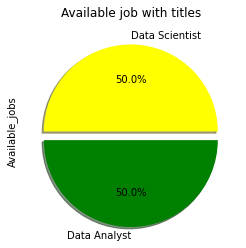

In [ ]:
colors = ['yellow', 'green']
dfJT1 = dfJT.set_index('Major_Job_Title')
dfJT1.plot.pie(y='Available_jobs',title="Available job with titles", legend=False, \
                   autopct='%1.1f%%', colors=colors , explode=(0, 0.1), \
                   shadow=True, startangle=0);


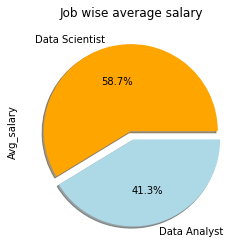

In [ ]:
colors = ['orange', 'lightblue']
dfJT2 = dfJT.set_index('Major_Job_Title')
dfJT2.plot.pie(y='Avg_salary',title="Job wise average salary", legend=False, \
                   autopct='%1.1f%%', colors=colors , explode=(0, 0.1), \
                   shadow=True, startangle=0);

**Average salary by company**

In [ ]:
df7 = df[df.salary != 'NA'].reset_index()
df7 = df7.groupby('Company_name').agg({'avg_salary':'mean','Company_name': ['count']})
df7.columns = ['Avg_salary','Available_jobs']
df7.Avg_salary = df7.Avg_salary.round(2)
df7 = df7.sort_values(['Avg_salary'],ascending=False).reset_index()
df7

,Company_name,Avg_salary,Available_jobs
0,Fundmetric,125000.0,25
1,Rocket Science Development,122500.0,25
2,Mastercard,120500.0,25
3,Ambyint Inc.,115000.0,25
4,Railtown AI Technologies,112500.0,25
5,IRIS Research & Development Inc.,110000.0,25
6,Points,108000.0,25
7,Bank of Canada,108000.0,25
8,Pairity,105000.0,25
9,Evergreen College,102960.0,25
